In [3]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# Simple regression data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.2, 1.9, 3.0, 3.9, 5.1])

In [5]:
class SVR_FromScratch:
    def __init__(self, lr=0.01, C=1.0, epsilon=0.1, epochs=1000):
        self.lr = lr
        self.C = C
        self.epsilon = epsilon
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                y_pred = np.dot(self.w, X[i]) + self.b
                error = y[i] - y_pred

                # Inside epsilon tube → no update
                if abs(error) <= self.epsilon:
                    continue

                # Outside tube → penalize
                if error > self.epsilon:
                    self.w += self.lr * (self.C * X[i])
                    self.b += self.lr * self.C

                elif error < -self.epsilon:
                    self.w -= self.lr * (self.C * X[i])
                    self.b -= self.lr * self.C

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [6]:
svr = SVR_FromScratch(epsilon=0.2)
svr.fit(X, y)

y_pred = svr.predict(X)

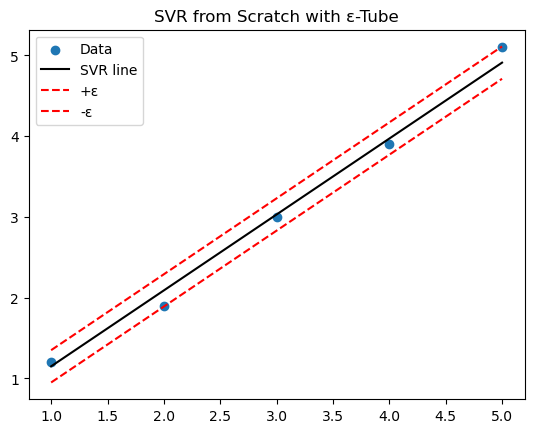

In [7]:
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="black", label="SVR line")
plt.plot(X, y_pred + svr.epsilon, "--", color="red", label="+ε")
plt.plot(X, y_pred - svr.epsilon, "--", color="red", label="-ε")

plt.legend()
plt.title("SVR from Scratch with ε-Tube")
plt.show()